In [1]:
#Importing project dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
#Rearranging columns so target variable loan status is on the right
df = df[[
    'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'person_age', 
    'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
    'cb_person_cred_hist_length', 'loan_status' ]] 

df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,RENT,PERSONAL,D,Y,22,59000,123.0,35000,16.02,0.59,3,1
1,OWN,EDUCATION,B,N,21,9600,5.0,1000,11.14,0.10,2,0
2,MORTGAGE,MEDICAL,C,N,25,9600,1.0,5500,12.87,0.57,3,1
3,RENT,MEDICAL,C,N,23,65500,4.0,35000,15.23,0.53,2,1
4,RENT,MEDICAL,C,Y,24,54400,8.0,35000,14.27,0.55,4,1


In [3]:
#Understanding table structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   cb_person_default_on_file   32581 non-null  object 
 4   person_age                  32581 non-null  int64  
 5   person_income               32581 non-null  int64  
 6   person_emp_length           31686 non-null  float64
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
#Getting descriptive statistics about numerical columns
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
#Checking null value counts for all columns
df.isnull().sum()

person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_age                       0
person_income                    0
person_emp_length              895
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [6]:
#Dropping all rows that have null values and saving to original dataframe
df.dropna(axis=0, inplace=True)

df.isnull().sum()

person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
#Checking value count for target variable to see class balance/imbalance
df['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

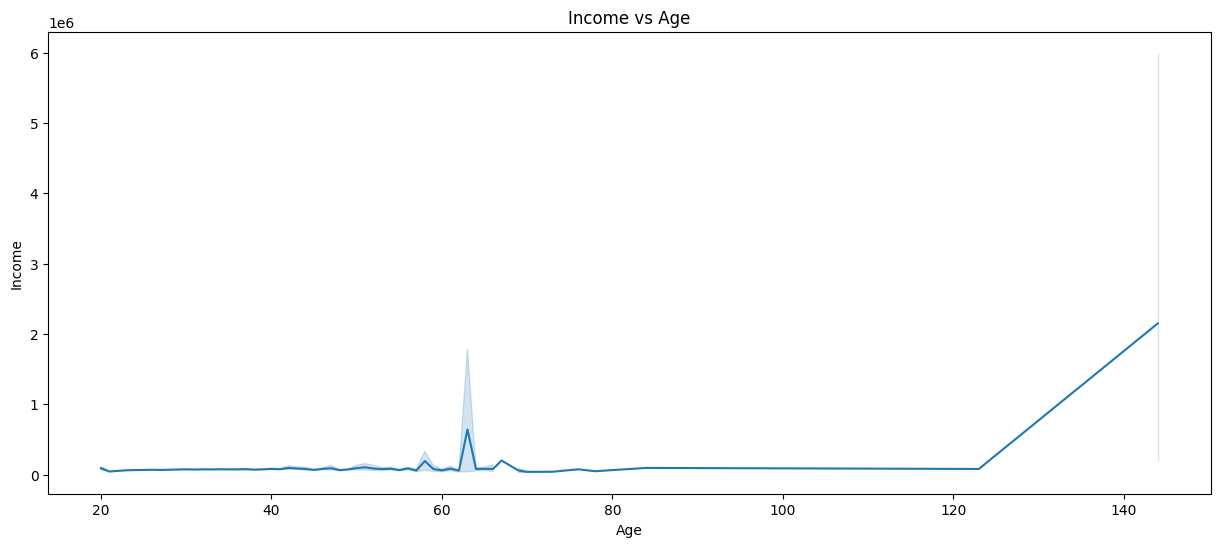

In [8]:
#Plotting to see if any relationship between age and income
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='person_age', y='person_income', data=df, ax=ax)
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<Axes: xlabel='person_emp_length', ylabel='person_income'>

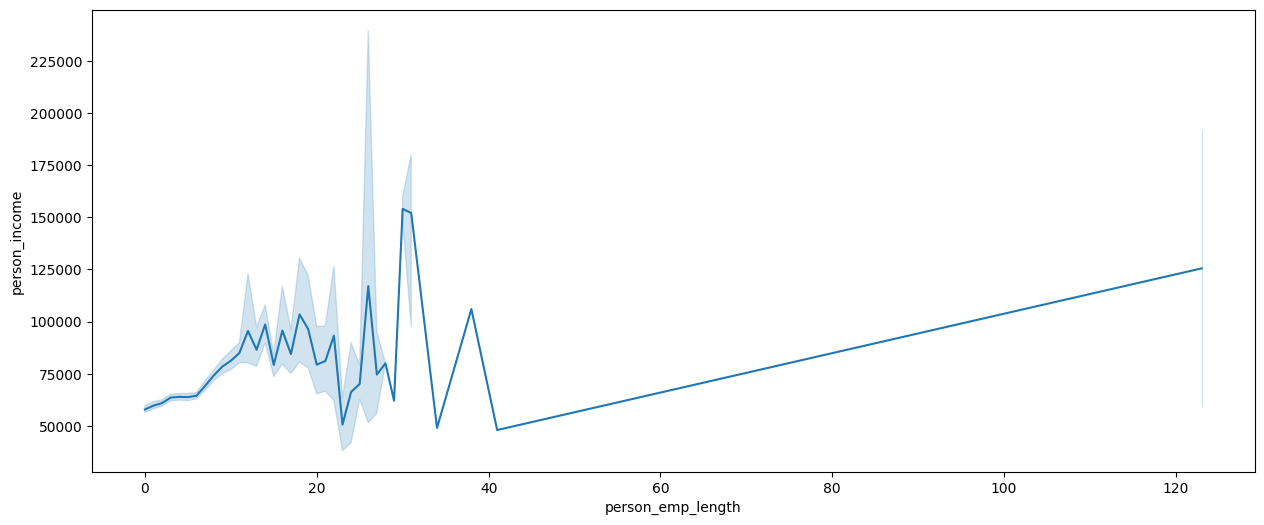

In [9]:
#Plotting to see if any relationship between employment length and income
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='person_emp_length', y='person_income', data=df, ax=ax)

<Axes: xlabel='loan_amnt', ylabel='person_income'>

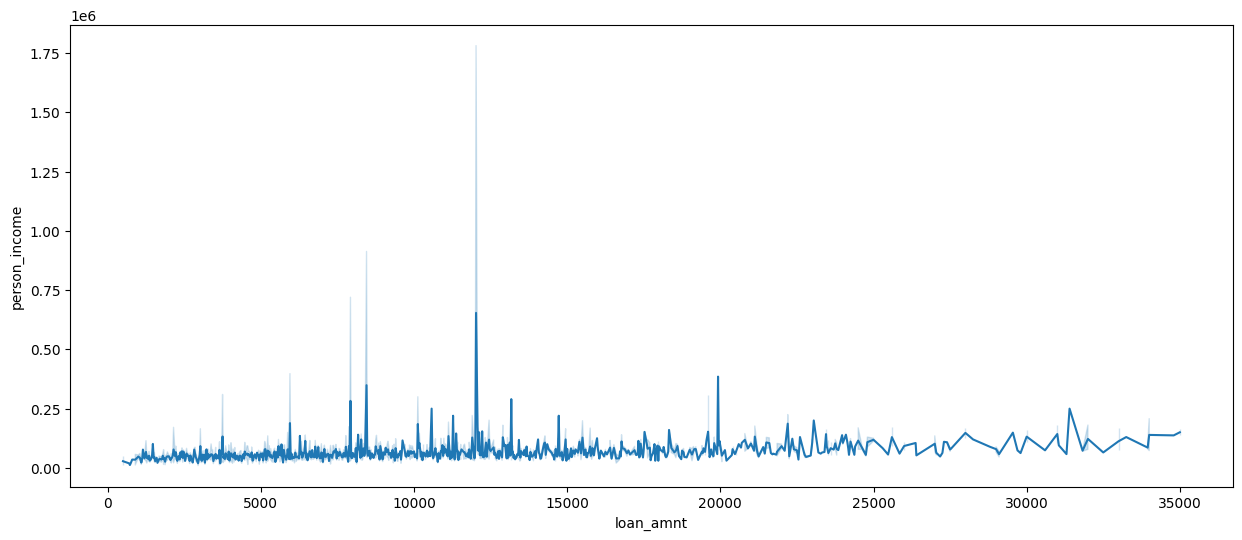

In [10]:
#Plotting to see if any relationship between loan amount and income
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='loan_amnt', y='person_income', data=df, ax=ax)

In [11]:
#Understanding correlations between numerical variables
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.178899,0.165787,0.054172,0.011019,-0.041065,0.859544,-0.023333
person_income,0.178899,1.000000,0.136825,0.265879,-0.001381,-0.251511,0.117076,-0.139938
person_emp_length,0.165787,0.136825,1.000000,0.110759,-0.056405,-0.055167,0.146336,-0.082638
loan_amnt,0.054172,0.265879,0.110759,1.000000,0.145904,0.577399,0.045294,0.113550
loan_int_rate,0.011019,-0.001381,-0.056405,0.145904,1.000000,0.123500,0.015371,0.339350
loan_percent_income,-0.041065,-0.251511,-0.055167,0.577399,0.123500,1.000000,-0.030080,0.379689
cb_person_cred_hist_length,0.859544,0.117076,0.146336,0.045294,0.015371,-0.030080,1.000000,-0.015649
loan_status,-0.023333,-0.139938,-0.082638,0.113550,0.339350,0.379689,-0.015649,1.000000


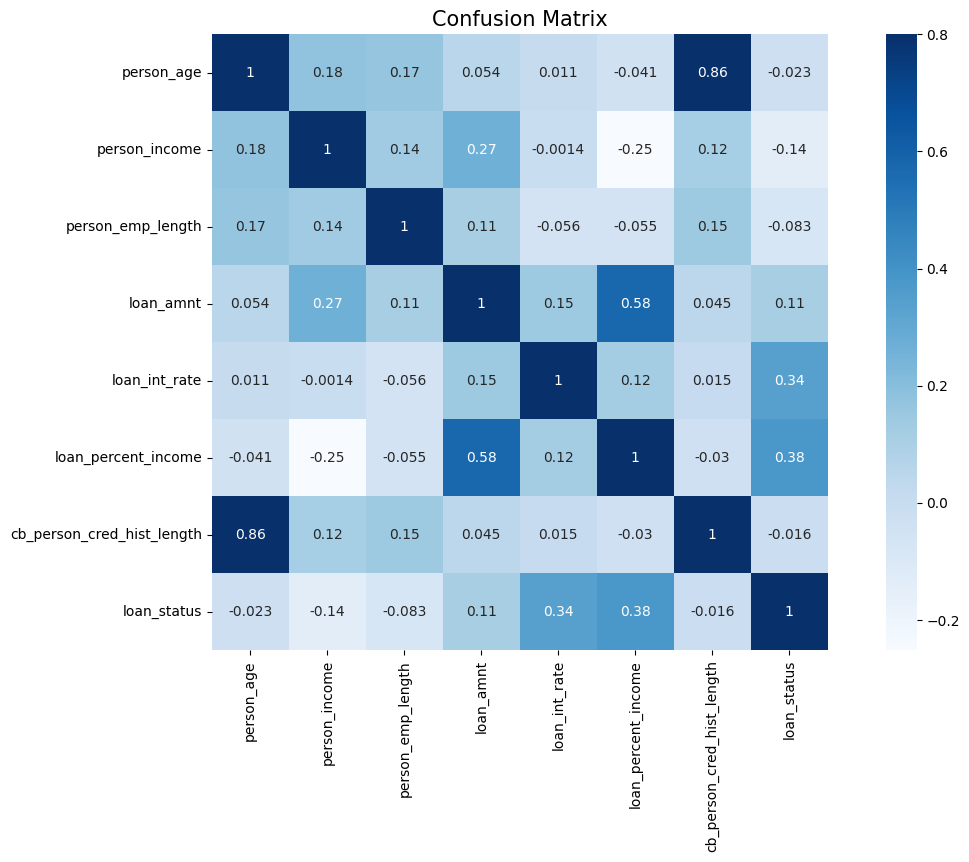

In [12]:
#Using seaborn heatmap for better correlation visualization
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df_numeric.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

In [13]:
#Plotly pie chart to see distribution of home ownership 
import plotly.express as px

home_counts = df.person_home_ownership.value_counts()

fig=px.pie(values = home_counts.values,
           names = home_counts.index,
           color_discrete_sequence=px.colors.sequential.Mint,
           title = 'Home Ownership Distribution'
           )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.update_layout(width=800, height=600)

fig.show()

In [14]:
#Plotly pie chart to see distribution of loan grades
import plotly.express as px

loan_grade_counts = df.loan_grade.value_counts()

fig=px.pie(values = loan_grade_counts.values,
           names = loan_grade_counts.index,
           color_discrete_sequence=px.colors.sequential.Mint,
           title = 'Loan Grades Distribution'
           )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.update_layout(width=800, height=600)

fig.show()

In [15]:
#Plotly histogram chart to see distribtion of loan intent
fig=px.histogram(df, x = 'loan_intent',histnorm = 'percent', 
                 text_auto = '.2f',template = 'presentation', title = 'Loan Intent Distribution',
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout()
fig.show()

In [16]:
#Plotly histogram to see distribution of credit history lengths
fig=px.histogram(df, x = 'cb_person_cred_hist_length',histnorm = 'density', 
                 text_auto = '.2f',template = 'presentation', title = 'Credit History Length Distribution',
                 color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()

fig.update_layout(width=1000, height=650)

fig.show()

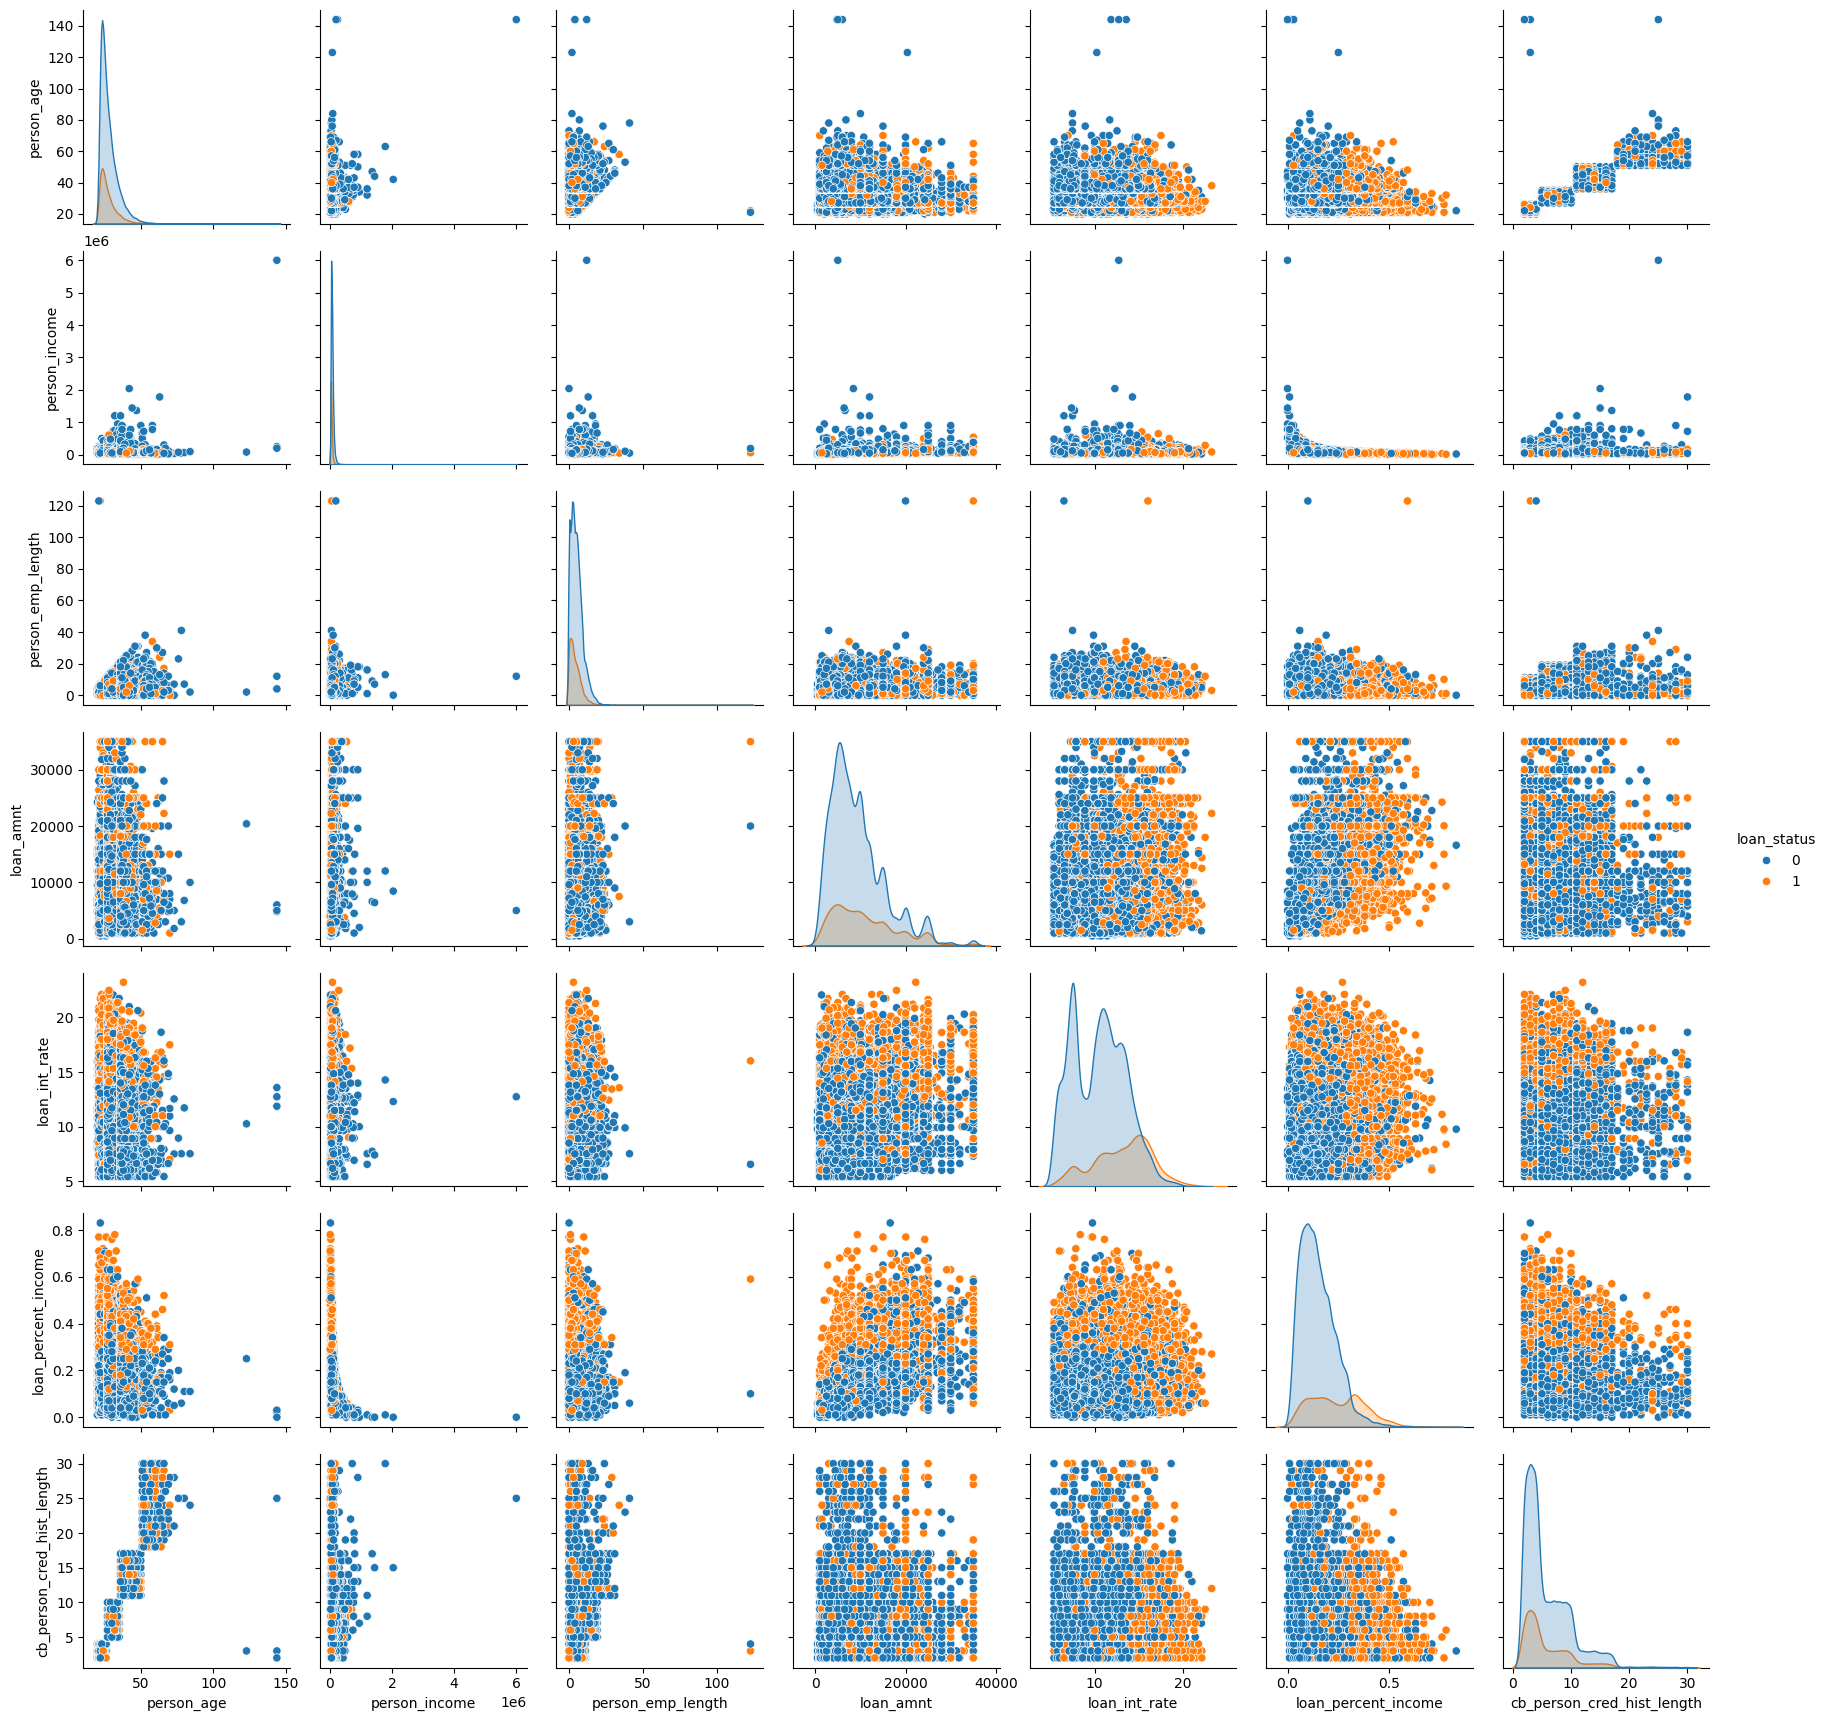

In [17]:
#Using seaborn pairplot to see relationships between all variables and identifying which data points are loan risks
sns.pairplot(df, hue='loan_status')

In [18]:
#Max age and max employment length are outliers and need to be removed
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488,5.793736,0.216600
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393,4.038483,0.411935
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [19]:
df.reset_index(inplace=True)

<BarContainer object of 57 artists>

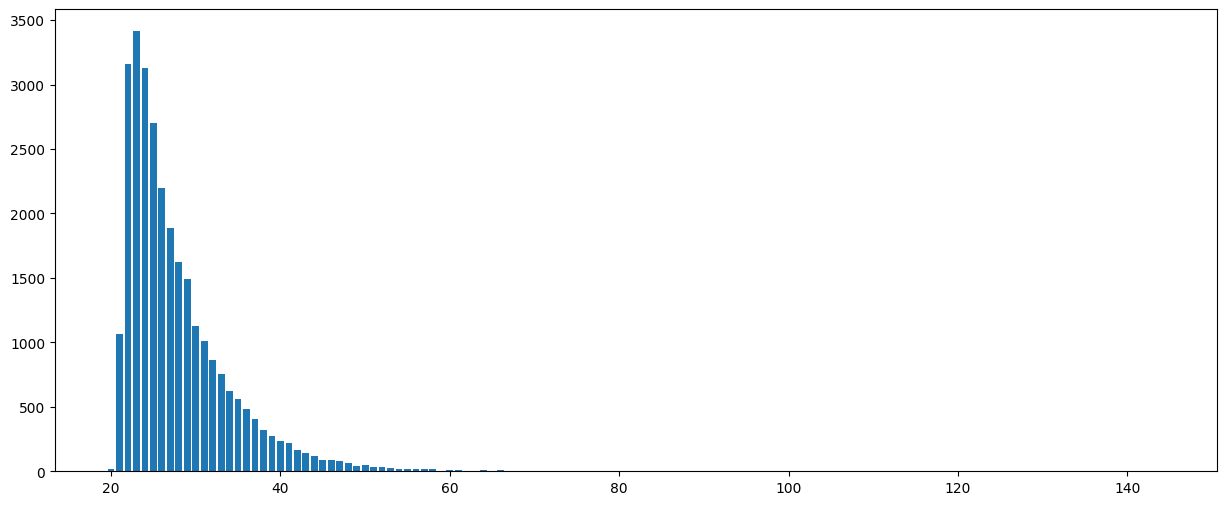

In [20]:
#Using matplotlib bar chart to visualize count distribution for persons age
vertical = df['person_age'].value_counts().values
horizontal = df['person_age'].value_counts().index

plt.figure(figsize=(15, 6))

plt.bar(horizontal, vertical)

In [21]:
#Seeing how many values there are for people older than 80
print((df['person_age'].value_counts().values>80).sum())

26


In [22]:
#Dropping age above 80 because they are outliers
df = df.drop(df[df['person_age'] > 80].index, axis=0)


<BarContainer object of 36 artists>

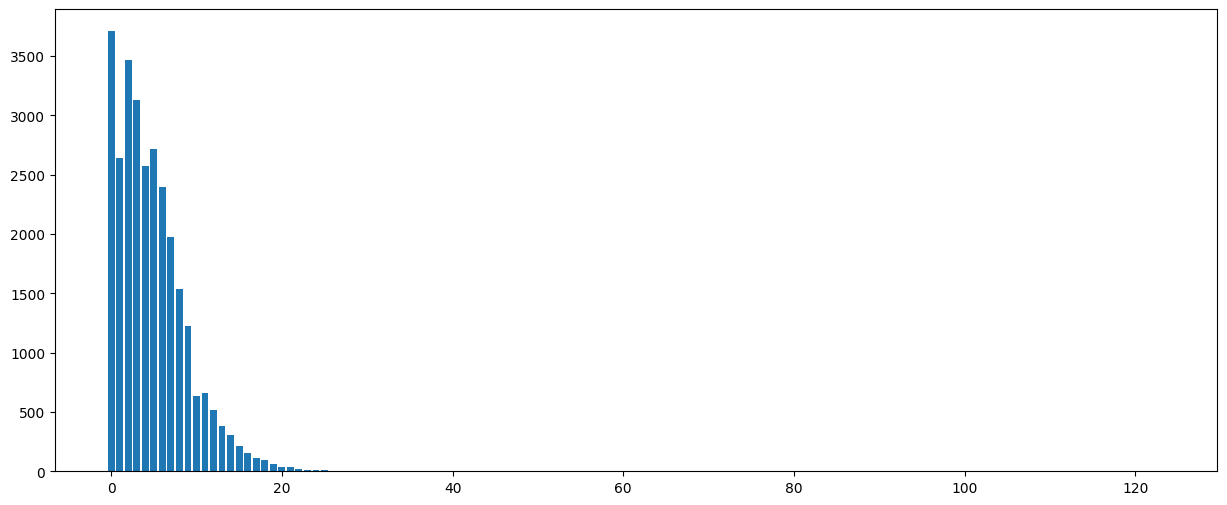

In [23]:
#Using matplotlib bar chart to visualize count distribution for persons employment length
vertical = df['person_emp_length'].value_counts().values
horizontal = df['person_emp_length'].value_counts().index

plt.figure(figsize=(15, 6))

plt.bar(horizontal, vertical)

In [24]:
#Dropping employment length above 40 because they are outliers

print((df['person_emp_length'].value_counts().values>40).sum())

df = df.drop(df[df['person_emp_length'] > 40].index, axis=0)

20


In [25]:
df.drop('index', axis=1, inplace=True)

In [26]:
#Categorizing ages into age groups
df['age_group'] = pd.cut(df['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [27]:
df['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [28]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group
1,OWN,EDUCATION,B,N,21,9600,5.0,1000,11.14,0.10,2,0,20-25
2,MORTGAGE,MEDICAL,C,N,25,9600,1.0,5500,12.87,0.57,3,1,20-25
3,RENT,MEDICAL,C,N,23,65500,4.0,35000,15.23,0.53,2,1,20-25
4,RENT,MEDICAL,C,Y,24,54400,8.0,35000,14.27,0.55,4,1,20-25
5,OWN,VENTURE,A,N,21,9900,2.0,2500,7.14,0.25,2,1,20-25


In [29]:
#Categorizing incomes into income groups
df['income_group'] = pd.cut(df['person_income'],
                           bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [30]:
df['income_group']

1                low
2                low
3             middle
4             middle
5                low
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28630, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [31]:
df['loan_amnt'].describe()

count    28630.000000
mean      9655.551869
std       6327.897150
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [32]:
#Categorizing loan amounts into loan amount groups
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                           bins=[0, 5000, 10000, 15000, float('inf')],
                           labels=['small', 'medium', 'large', 'very large'])

In [33]:
df['loan_amount_group']

1             small
2            medium
3        very large
4        very large
5             small
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28630, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [34]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group
1,OWN,EDUCATION,B,N,21,9600,5.0,1000,11.14,0.10,2,0,20-25,low,small
2,MORTGAGE,MEDICAL,C,N,25,9600,1.0,5500,12.87,0.57,3,1,20-25,low,medium
3,RENT,MEDICAL,C,N,23,65500,4.0,35000,15.23,0.53,2,1,20-25,middle,very large
4,RENT,MEDICAL,C,Y,24,54400,8.0,35000,14.27,0.55,4,1,20-25,middle,very large
5,OWN,VENTURE,A,N,21,9900,2.0,2500,7.14,0.25,2,1,20-25,low,small


In [35]:
#Creating new columns out of existing columns
df['emp_length_to_loan_amnt_ratio'] = df['person_emp_length'] / df['loan_amnt']

df['int_rate_to_loan_amnt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28630 entries, 1 to 28637
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   person_home_ownership          28630 non-null  object  
 1   loan_intent                    28630 non-null  object  
 2   loan_grade                     28630 non-null  object  
 3   cb_person_default_on_file      28630 non-null  object  
 4   person_age                     28630 non-null  int64   
 5   person_income                  28630 non-null  int64   
 6   person_emp_length              28630 non-null  float64 
 7   loan_amnt                      28630 non-null  int64   
 8   loan_int_rate                  28630 non-null  float64 
 9   loan_percent_income            28630 non-null  float64 
 10  cb_person_cred_hist_length     28630 non-null  int64   
 11  loan_status                    28630 non-null  int64   
 12  age_group                      28601 

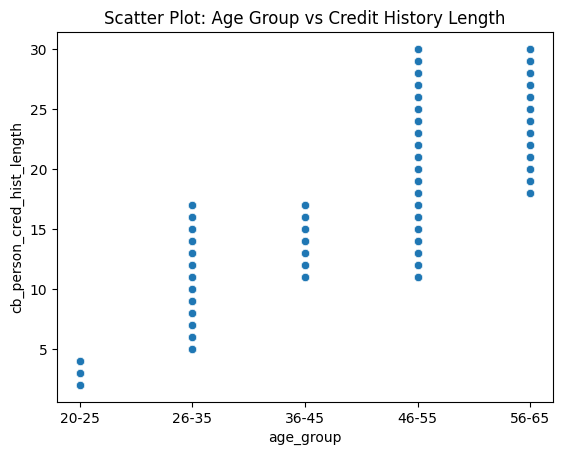

In [37]:
#Scatterplot to see relationship between age group and credit history length
sns.scatterplot(x='age_group', y='cb_person_cred_hist_length', data=df)
plt.title("Scatter Plot: Age Group vs Credit History Length")
plt.show()

In [38]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group,emp_length_to_loan_amnt_ratio,int_rate_to_loan_amnt_ratio
1,OWN,EDUCATION,B,N,21,9600,5.0,1000,11.14,0.10,2,0,20-25,low,small,0.005000,0.011140
2,MORTGAGE,MEDICAL,C,N,25,9600,1.0,5500,12.87,0.57,3,1,20-25,low,medium,0.000182,0.002340
3,RENT,MEDICAL,C,N,23,65500,4.0,35000,15.23,0.53,2,1,20-25,middle,very large,0.000114,0.000435
4,RENT,MEDICAL,C,Y,24,54400,8.0,35000,14.27,0.55,4,1,20-25,middle,very large,0.000229,0.000408
5,OWN,VENTURE,A,N,21,9900,2.0,2500,7.14,0.25,2,1,20-25,low,small,0.000800,0.002856


In [39]:
#Label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    if col in df[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'age_group', 'income_group', 'loan_amount_group']]:
        df[col] = encoder.fit_transform(df[col])

In [40]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group,emp_length_to_loan_amnt_ratio,int_rate_to_loan_amnt_ratio
1,2,1,1,0,21,9600,5.0,1000,11.14,0.10,2,0,0,2,2,0.005000,0.011140
2,0,3,2,0,25,9600,1.0,5500,12.87,0.57,3,1,0,2,1,0.000182,0.002340
3,3,3,2,0,23,65500,4.0,35000,15.23,0.53,2,1,0,4,3,0.000114,0.000435
4,3,3,2,1,24,54400,8.0,35000,14.27,0.55,4,1,0,4,3,0.000229,0.000408
5,2,5,0,0,21,9900,2.0,2500,7.14,0.25,2,1,0,2,2,0.000800,0.002856


In [41]:
#Performing Chi-Square to see significance with target variable
from sklearn.feature_selection import chi2

x = df[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'age_group', 'income_group']]

y = df['loan_status']

chi_scores = chi2(x, y)

chi_scores

(array([1523.55601385,  141.43211461, 4604.60650842,  778.08621147,
          11.58502028,  136.79721186]),
 array([0.00000000e+000, 1.29435784e-032, 0.00000000e+000, 3.13758705e-171,
        6.64852090e-004, 1.33550528e-031]))

<Axes: >

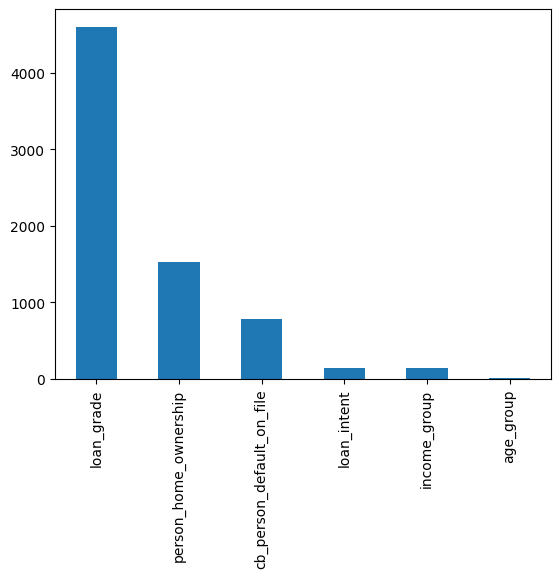

In [42]:
#Higher the Chi-Value, the more significant
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

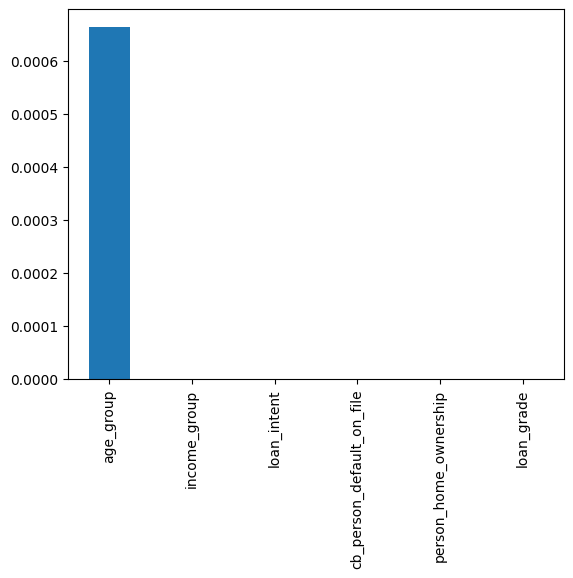

In [60]:
#P-Value < 0.05 is statistically significant
p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [44]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group,emp_length_to_loan_amnt_ratio,int_rate_to_loan_amnt_ratio
1,2,1,1,0,21,9600,5.0,1000,11.14,0.10,2,0,0,2,2,0.005000,0.011140
2,0,3,2,0,25,9600,1.0,5500,12.87,0.57,3,1,0,2,1,0.000182,0.002340
3,3,3,2,0,23,65500,4.0,35000,15.23,0.53,2,1,0,4,3,0.000114,0.000435
4,3,3,2,1,24,54400,8.0,35000,14.27,0.55,4,1,0,4,3,0.000229,0.000408
5,2,5,0,0,21,9900,2.0,2500,7.14,0.25,2,1,0,2,2,0.000800,0.002856


In [45]:
#Scaling numerical columns
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

categories = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'emp_length_to_loan_amnt_ratio', 'int_rate_to_loan_amnt_ratio']

for col in categories:
        df[col] = scalar.fit_transform(df[[col]])

In [46]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group,emp_length_to_loan_amnt_ratio,int_rate_to_loan_amnt_ratio
1,2,1,1,0,-1.089745,-1.102394,0.054802,-1.367864,0.030982,-0.653390,-0.940031,0,0,2,2,3.943849,4.965718
2,0,3,2,0,-0.439967,-1.102394,-0.937760,-0.656715,0.566697,3.765543,-0.692148,1,0,2,1,-0.544466,0.253960
3,3,3,2,0,-0.764856,-0.017967,-0.193338,4.005263,1.297498,3.389464,-0.940031,1,0,4,3,-0.607375,-0.765952
4,3,3,2,1,-0.602412,-0.233300,0.799224,4.005263,1.000223,3.577503,-0.444266,1,0,4,3,-0.500914,-0.780638
5,2,5,0,0,-1.089745,-1.096574,-0.689620,-1.130814,-1.207664,0.756908,-0.940031,1,0,2,2,0.031393,0.530240


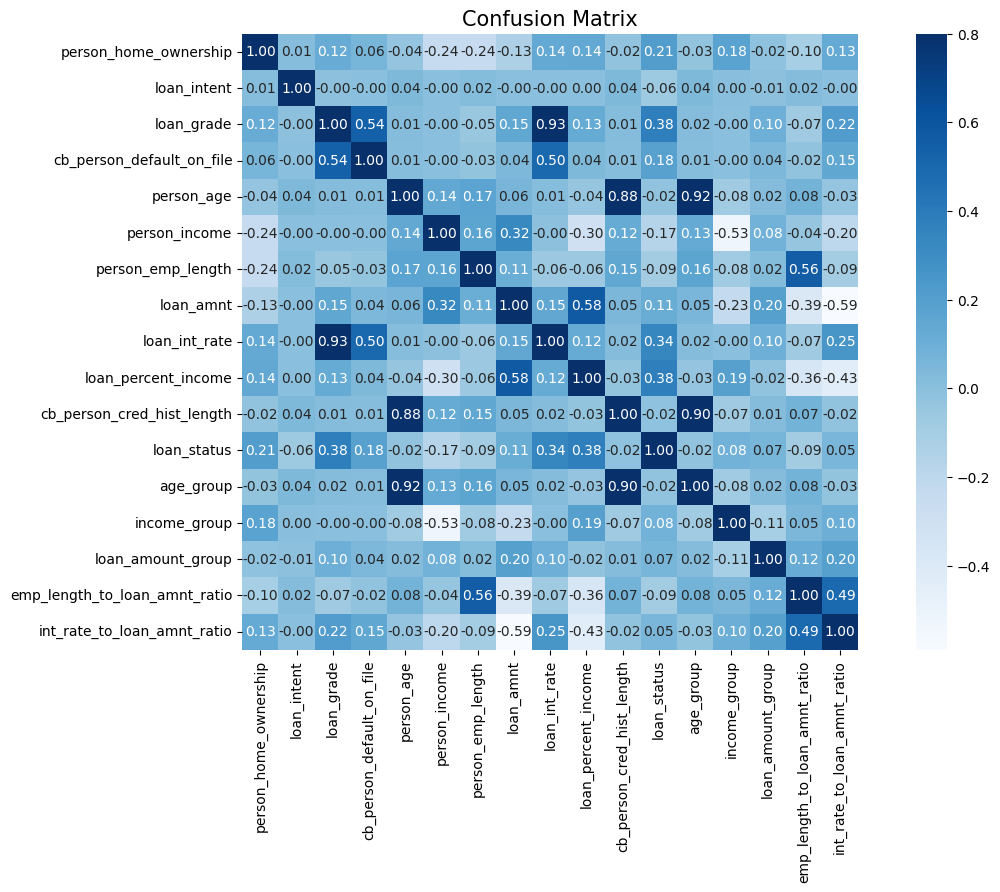

In [47]:
#Visualizing all correlations after scaling and encoding
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix',fontsize=15);

In [48]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,age_group,income_group,loan_amount_group,emp_length_to_loan_amnt_ratio,int_rate_to_loan_amnt_ratio
1,2,1,1,0,-1.089745,-1.102394,0.054802,-1.367864,0.030982,-0.653390,-0.940031,0,0,2,2,3.943849,4.965718
2,0,3,2,0,-0.439967,-1.102394,-0.937760,-0.656715,0.566697,3.765543,-0.692148,1,0,2,1,-0.544466,0.253960
3,3,3,2,0,-0.764856,-0.017967,-0.193338,4.005263,1.297498,3.389464,-0.940031,1,0,4,3,-0.607375,-0.765952
4,3,3,2,1,-0.602412,-0.233300,0.799224,4.005263,1.000223,3.577503,-0.444266,1,0,4,3,-0.500914,-0.780638
5,2,5,0,0,-1.089745,-1.096574,-0.689620,-1.130814,-1.207664,0.756908,-0.940031,1,0,2,2,0.031393,0.530240


In [49]:
#Import scikit-learn libraries for machine learning implementation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Splitting variables into predictors and target
X = df.drop(columns = 'loan_status')
y = df['loan_status']

#Splitting data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing model and fitting training data
model = LogisticRegression()
model.fit(X_train, y_train)

#Using K-Fold to assess based off subsets of training data
k = 5
cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')

y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

report = classification_report(y_test, y_predict)

#Outputting evaluation scores
print(f'Cross-Validation accuracy scores: {cv_scores}')
print(f'Average of Cross-Validation accuracy scores: {cv_scores.mean()}')
print(f'Test Set accuracy: {accuracy}')
print(f'Report: {report}')

Cross-Validation accuracy scores: [0.84326566 0.84850469 0.85112421 0.84348396 0.85458515]
Average of Cross-Validation accuracy scores: 0.8481927345624465
Test Set accuracy: 0.8508557457212714
Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4479
           1       0.74      0.48      0.58      1247

    accuracy                           0.85      5726
   macro avg       0.81      0.72      0.75      5726
weighted avg       0.84      0.85      0.84      5726



In [50]:
#Importing Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

#Initializing model and fitting training data
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

#Using K-Fold to assess based off subsets of training data
k = 5
cv_scores2 = cross_val_score(model2, X_train, y_train, cv=k, scoring='accuracy')

y_predict2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_predict2)
report2 = classification_report(y_test, y_predict2)

#Outputting evaluation scores
print(f'Cross-Validation accuracy scores: {cv_scores2}')
print(f'Average of Cross-Validation accuracy scores: {cv_scores2.mean()}')
print(f'Test Set accuracy: {accuracy2}')
print(f'Report: {report2}')

Cross-Validation accuracy scores: [0.93101943 0.93080114 0.92490723 0.92599869 0.92991266]
Average of Cross-Validation accuracy scores: 0.9285278285380377
Test Set accuracy: 0.9231575270695075
Report:               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4479
           1       0.95      0.69      0.80      1247

    accuracy                           0.92      5726
   macro avg       0.93      0.84      0.87      5726
weighted avg       0.92      0.92      0.92      5726



In [51]:
#Getting feature importance in descending order
importances = model2.feature_importances_

feature_importance = list(zip(X_train.columns, importances))

feature_importance.sort(key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

loan_percent_income: 0.19166727502300998
person_income: 0.11950999241648098
loan_grade: 0.11670037742376885
loan_int_rate: 0.10144590500242266
person_home_ownership: 0.09444579691432502
int_rate_to_loan_amnt_ratio: 0.06304865502822643
loan_intent: 0.06017984411505251
loan_amnt: 0.05298860728677555
emp_length_to_loan_amnt_ratio: 0.050185044119464325
person_emp_length: 0.040909858472124964
person_age: 0.033466797607737846
cb_person_cred_hist_length: 0.026475144173829554
income_group: 0.019264244736537234
cb_person_default_on_file: 0.011248081946342081
loan_amount_group: 0.011189614547958956
age_group: 0.007274761185943096


In [52]:
#Keeping only most relevant features in my training/testing sets
important_features = [feature for feature, importance in zip(X_train.columns, model2.feature_importances_) if importance >= 0.064]

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [53]:
#Evaluating model with only high importance features
model2.fit(X_train_reduced, y_train)
y_predict2 = model2.predict(X_test_reduced)

accuracy2 = accuracy_score(y_test, y_predict2)
report2 = classification_report(y_test, y_predict2)

print(f'Cross-Validation accuracy scores: {cv_scores2}')
print(f'Average of Cross-Validation accuracy scores: {cv_scores2.mean()}')
print(f'Test Set accuracy: {accuracy2}')
print(f'Report: {report2}')

Cross-Validation accuracy scores: [0.93101943 0.93080114 0.92490723 0.92599869 0.92991266]
Average of Cross-Validation accuracy scores: 0.9285278285380377
Test Set accuracy: 0.8985330073349633
Report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4479
           1       0.81      0.69      0.75      1247

    accuracy                           0.90      5726
   macro avg       0.87      0.82      0.84      5726
weighted avg       0.90      0.90      0.90      5726



In [54]:
#Importing and evaluating XGBoost 
import xgboost as xgb

model3 = xgb.XGBClassifier()

model3.fit(X_train_reduced, y_train)
y_predict3 = model3.predict(X_test_reduced)

accuracy3 = accuracy_score(y_test, y_predict3)
report3 = classification_report(y_test, y_predict3)

print(f'Test Set accuracy: {accuracy3}')
print(f'Report: {report3}')

Test Set accuracy: 0.9009779951100244
Report:               precision    recall  f1-score   support

           0       0.91      0.96      0.94      4479
           1       0.84      0.67      0.75      1247

    accuracy                           0.90      5726
   macro avg       0.88      0.82      0.84      5726
weighted avg       0.90      0.90      0.90      5726



In [61]:
#Creating new prediction data to test XGBoost model
prediction_data = [
    ["Own", "B", 50000, 6.0, 0.25],
    ["Mortgage", "A", 75000, 4.0, 0.22],
    ["Rent", "C", 28000, 9.0, 0.35],
    ["Own", "D", 65000, 7.5, 0.30],
    ["Rent", "E", 30000, 8.2, 0.38],
    ["Mortgage", "B", 55000, 5.2, 0.26],
    ["Own", "C", 40000, 6.5, 0.29],
    ["Rent", "A", 85000, 3.5, 0.19],
    ["Mortgage", "D", 72000, 7.0, 0.31],
    ["Own", "E", 33000, 8.8, 0.36],
    ["Mortgage", "B", 0, 4.5, 0.10],
    ["Mortgage", "D", 97000, 10.0, 0.60],
    ["Mortgage", "D", 97000, 10.0, 0.60]
]

columns = ["person_home_ownership", "loan_grade", "person_income", "loan_int_rate", "loan_percent_income"]

data = pd.DataFrame(prediction_data, columns=columns)

categorical = data[['person_home_ownership', 'loan_grade']]

for col in categorical:
    data[col] = encoder.fit_transform(data[col])

numerical = data[['person_income', 'loan_int_rate', 'loan_percent_income']]

for col in numerical:
    data[col] = scalar.fit_transform(data[numerical.columns])

In [58]:
#Making new predictions to output credit risk/no risk
new_predictions = model3.predict(data)
print(new_predictions)

[0 0 0 1 1 0 0 0 0 0 0 0 0]
